work no: 1

Date 03.06.2020

In [66]:
import os.path
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve, boxcar, savgol_filter
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline

In [67]:
path.isfile(r"100_noisy_samplesA.csv")

True

In [68]:
df = pd.read_csv(r"100_noisy_samplesA.csv",header = None,usecols = list(range(1,1000)))

In [69]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,0.290485,0.723549,0.908675,1.011652,0.280142,0.641098,0.621756,0.754564,0.072190,0.781408,...,NaN,0.860184,0.292877,0.802291,0.227293,0.868965,0.951896,0.724154,0.577050,NaN
1,0.307763,0.223661,0.245477,NaN,0.683266,0.180099,NaN,0.707277,NaN,NaN,...,0.872974,0.656137,0.091642,NaN,NaN,0.966439,0.996754,0.061796,NaN,NaN
2,NaN,0.483362,0.871597,NaN,NaN,NaN,0.389561,0.763197,NaN,NaN,...,0.405564,NaN,NaN,0.847435,0.322934,0.616900,0.526608,NaN,0.811156,NaN
3,0.473682,0.476490,NaN,0.257732,0.893229,0.790289,0.942462,NaN,0.312490,NaN,...,0.730335,0.053068,0.348438,NaN,0.879613,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.922035,1.002515,0.075272,0.242141,NaN,0.168365,0.657401,0.407852,...,0.686111,NaN,0.029991,NaN,NaN,0.452539,0.793662,0.954226,NaN,NaN


In [70]:
df = df.fillna(df.mean())

In [71]:
df.shape

(100, 999)

In [72]:
df = df.fillna(0)

In [73]:
df = df.T

In [74]:
#df.head()

In [75]:
df.shape

(999, 100)

**SAMPLE GAUSSIAN PLOT**

In [76]:
gauss = list()

for i in range(100):
    temp = df[:][i]
    fil = gaussian_filter1d(temp,sigma = 5)
    gauss.append(np.array(fil))

gauss = np.array(gauss)
gauss = pd.DataFrame(gauss)
gauss = gauss.T

#gauss.to_csv('gauss.csv', index=False)

In [77]:
d1 = list()
d2 = list()
d3 = list()
d4 = list()

for i in range(100):
    temp = gauss[:][i]
    
    one = np.gradient(temp)
    two = np.diff(one, 1)

    three = np.diff(two, 1)
    four = np.diff(three, 1)
    
    d1.append(one)
    d2.append(two)
    d3.append(three)
    d4.append(four)

d1 = np.array(d1)
d1 = pd.DataFrame(d1)

d2 = np.array(d2)
d2 = pd.DataFrame(d2)

d3 = np.array(d3)
d3 = pd.DataFrame(d3)

d4 = np.array(d4)
d4 = pd.DataFrame(d4)

d1.to_csv('derivative_1.csv', index=False)
d2.to_csv('derivative_2.csv', index=False)
d3.to_csv('derivative_3.csv', index=False)
d4.to_csv('derivative_4.csv', index=False)

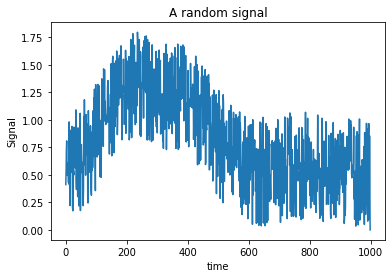

In [78]:
signal = df[:][i]
plt.plot(signal)
plt.title("A random signal")
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

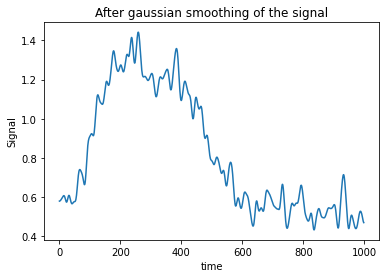

In [79]:
plt.plot(temp)
plt.title("After gaussian smoothing of the signal")
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

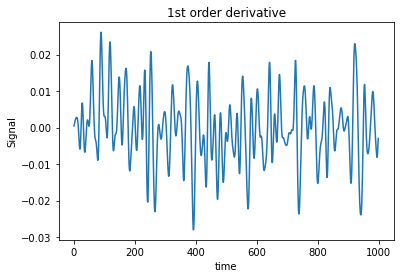

In [80]:
plt.plot(one)
plt.title("1st order derivative")
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

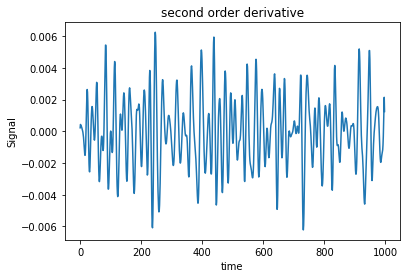

In [81]:
plt.plot(two)
plt.title("second order derivative")
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

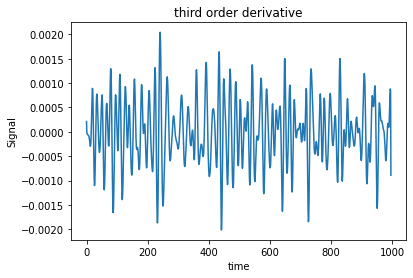

In [82]:
plt.plot(three)
plt.title("third order derivative")
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

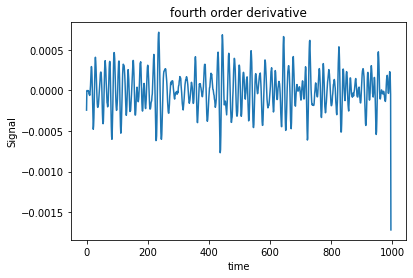

In [83]:
plt.plot(four)
plt.title("fourth order derivative")
plt.xlabel("time")
plt.ylabel("Signal")
plt.show()

In [84]:
x = np.array([1, 2, 4, 7, 0])
np.diff(x)

array([ 1,  2,  3, -7])

In [85]:
np.diff(x, n=2)

array([  1,   1, -10])